Motivation: Why am I working on this project?
 My project is motivated by a desire to gain deeper insights into my own music listening patterns to gaining insights and understanding my personal music listening habits and preferences. It's common for people to be curious about their own music consumption patterns, and this project provides a way to analyze and visualize those patterns.It's a way to connect more with my musical preferences and understand the trends in my listening behavior.  It's an excellent opportunity to practice and showcase my skills in Python programming, data analysis, and visualization. Working with the Spotify API in particular can add a valuable dimension to my coding and data analysis repertoire. 

Data source: Where did I get this data? How did I
collect it?

 My data is obtained from Spotify's Web API, which provides a rich set of endpoints to access various music-related data. Spotipy, a Python library for Spotify's Web API, simplifies the process of accessing this data. Specifically, I am analyzing my personal Spotify data, including top artists, tracks, genres, and listening trends over different time ranges.

Data analysis: 
 Techniques: The project employs several data analysis techniques:
  API Data Fetching: Retrieving data from Spotify's API.
  Data Aggregation and Transformation: Aggregating data based on different     criteria like genres, artists, and timeframes.
  Exploratory Data Analysis: Using Pandas for data manipulation and 
  exploration.
  Visualization: Creating various charts and plots using Matplotlib to 
  visualize my music listening patterns.
 Stages:
  Data Collection: Fetching data from Spotify using Spotipy.
  Data Cleaning and Preparation: Processing and structuring the data for
  analysis.
  Exploratory Analysis: Understanding the basic patterns and trends.
  In-depth Analysis: Diving deeper into specific aspects like genre trends,
  artist preferences, and listening habits.
  Visualization: Graphically representing the data for easier interpretation.
  

Findings: What did I learned about myself?
 I learned about my personal music preferences. I had insights into my favorite genres, artists, and tracks, and how these preferences vary over different time periods. I analized my listening habits, had an understanding of how my listening habits change over time, such as preferred times of day for listening to music, and how these habits compare to global trends.  had done trend analysis, identification of trends, such as emerging genres or artists in my listening behavior over different time frames.

Limitations and future work: What could be done better?

 Data Scope: The analysis is limited to the data provided by Spotify.   Expanding the data source to include other music platforms or social media reactions could provide a more comprehensive view.
 Algorithmic Bias: The recommendations and data from Spotify are influenced by its algorithms, which may skew the analysis based on the platform's suggestion patterns.
 Longitudinal Study: Extending the analysis over a longer period could reveal more about how your music tastes evolve.
 
Do I have any future plans about my project?
 
 Integration with Other Services: I am considering integrating data from other music services or platforms to broaden the analysis scope.
 Social Aspect: Analyzing how my music preferences correlate with social trends or events could add an interesting dimension.
 Collaborative Features: Adding features where you can compare your tastes with friends or other users, fostering a social aspect to your project.

# Understanding the purpose

In [1]:
!pip install spotipy
import spotipy
import pandas as pd
import matplotlib.pyplot as plt

import spotipy
from spotipy.oauth2 import SpotifyOAuth

# Replace these with your Spotify API credentials
client_id = '961b3169232448309a978bb1ea0a20d9'
client_secret = '3d947f0b28b14cd2a57a4da17265eb42'
redirect_uri = 'http://localhost:5173/callback'

# Scope to define what we will access
scope = 'user-library-read playlist-read-private'

# Authenticate and create a Spotify object
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id, client_secret, redirect_uri, scope=scope))


In here I am displaying my top favorite artists from last year based on my Spotify data. The purpose of this code is to provide insight into my music preferences by showcasing the artists I listened to the most during the past year. This information is going to be useful for understanding my musical taste and will be used as input or features in my broader project for music analysis and predictions.

In [2]:
scope = 'user-top-read'

# Authenticate and create a Spotify object
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id, client_secret, redirect_uri, scope=scope))

# Fetch your top artists from last year
time_range = 'long_term'  # Use 'long_term' for last year's data
limit = 5  # Get the top 5 favorite artists

top_artists = sp.current_user_top_artists(time_range=time_range, limit=limit)

# Print the top 5 favorite artists
print("Your Top 5 Favorite Artists from Last Year:")
for i, artist in enumerate(top_artists['items'], start=1):
    print(f"{i}. {artist['name']}")

Your Top 5 Favorite Artists from Last Year:
1. Doja Cat
2. Duman
3. The Weeknd
4. BØRNS
5. Billie Eilish


This is an analysis of the genres of my top music tracks for the current year. I got my top tracks for the "long_term" time range. These are the tracks I have listened to the most over an extended period. I iterate through my top tracks and, for each track, extract the artist's ID. Using the artist's ID, I fetch information about the artist, including their associated genres and visualize the top 10 music genres based on the genre counts.
 The chart displays the genre names and their respective percentages of my top tracks for the current year. The purpose of this part is to provide a visual representation of my music genre preferences for the current year. This information is valuable for understanding my music taste and will be used as part of my project for music analysis and predictions.


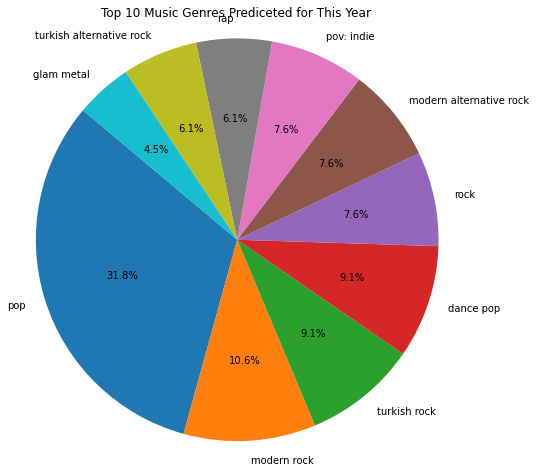

In [3]:

# Scope to define what we will access
scope = 'user-top-read'

# Authenticate and create a Spotify object
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id, client_secret, redirect_uri, scope=scope))

# Get your top tracks for the "short_term" time range
top_tracks = sp.current_user_top_tracks(limit=50, time_range='long_term')['items']

# Count the genres of your top tracks
genre_counts = {}

for track in top_tracks:
    artist_id = track['artists'][0]['id']
    artist = sp.artist(artist_id)
    genres = artist['genres']

    for genre in genres:
        genre_counts[genre] = genre_counts.get(genre, 0) + 1

# Create a DataFrame for the genre counts
df_genres = pd.DataFrame(list(genre_counts.items()), columns=['Genre', 'Count'])
df_genres.sort_values('Count', ascending=False, inplace=True)
df_top_genres = df_genres.head(10)

# Plot a pie chart of the top 10 genres
plt.figure(figsize=(8, 8))
plt.pie(df_top_genres['Count'], labels=df_top_genres['Genre'], autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Music Genres Prediceted for This Year')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


Purpose of this part is to leverage Spotify's recommendation algorithms to discover new music based on my established preferences. It automates the process of playlist creation, making it easier to explore music that aligns with my tastes. This could be a practical tool for music discovery and enjoyment within your project. It works by taking my top artists over a long-term period and generating a personalized Spotify playlist based on that data.

In [4]:


# Scope to define what we will access
scope = 'playlist-modify-private user-top-read playlist-read-private'

# Authenticate and create a Spotify object
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id, client_secret, redirect_uri, scope=scope))

# Get your top 5 artists from long-term listening data
top_artists = sp.current_user_top_artists(time_range='long_term', limit=5)

# Extract the artist IDs of your top 5 artists
favorite_artist_ids = [artist['id'] for artist in top_artists['items']]

# Create a list to store track URIs
recommended_track_uris = []

# Get recommended tracks based on your favorite artists
for artist_id in favorite_artist_ids:
    recommended_tracks = sp.recommendations(seed_artists=[artist_id], limit=5)  # You can adjust the limit as needed
    for track in recommended_tracks['tracks']:
        recommended_track_uris.append(track['uri'])

# Create a new playlist and add recommended tracks to it
playlist_name = 'Recommended Songs'
playlist_description = 'Recommended songs based on your top 5 artists (long-term)'

user_id = sp.me()['id']
playlist = sp.user_playlist_create(user_id, playlist_name, public=False, description=playlist_description)
sp.playlist_add_items(playlist['id'], recommended_track_uris)

print(f'Playlist "{playlist_name}" created with {len(recommended_track_uris)} recommended songs!')

# Fetch and print the content of the playlist
playlist_tracks = sp.playlist_tracks(playlist['id'])
print(f'Content of the "{playlist_name}" playlist:')
for track in playlist_tracks['items']:
    track_name = track['track']['name']
    artist_names = [artist['name'] for artist in track['track']['artists']]
    print(f'Track: {track_name}, Artists: {", ".join(artist_names)}')


Playlist "Recommended Songs" created with 25 recommended songs!
Content of the "Recommended Songs" playlist:
Track: Bad Habit, Artists: Steve Lacy
Track: So High, Artists: Doja Cat
Track: The Sweet Escape, Artists: Gwen Stefani, Akon
Track: We're Good, Artists: Dua Lipa
Track: Playing Games (with Bryson Tiller) - Extended Version, Artists: Summer Walker, Bryson Tiller
Track: Bir Pazar Kahvaltısı, Artists: emre aydın, Model
Track: Ceviz Ağacı, Artists: Cem Karaca
Track: Yansın, Artists: Çağan Şengül, emre aydın
Track: ama hala, Artists: Mavi
Track: Yine Yazı Bekleriz, Artists: TNK
Track: Pacify Her, Artists: Melanie Martinez
Track: Animals, Artists: Maroon 5
Track: U Are My High (with Future), Artists: DJ Snake, Future
Track: tears in the club (feat. the weeknd), Artists: FKA twigs, The Weeknd
Track: What You Need - Original, Artists: The Weeknd
Track: Man, Artists: BØRNS
Track: Cardiac Arrest, Artists: Bad Suns
Track: Rosyln, Artists: Bon Iver, St. Vincent
Track: Meet Me In The Woods, 

This part is designed to create an interactive widget in that allows you to visualize my the top tracks and their popularity for my favorite artists on Spotify. The purpose of this part within my project is to provide a user-friendly interface for exploring the data collected from Spotify. By clicking on an artist's name, which are my top 3 most listened artists from long-term period, you can quickly see a visual representation of their most popular tracks according to Spotify's data. This is particularly useful for presentations or for users who prefer interactive visual data exploration over reading raw data or navigating through text-based menus. It is a step towards making my analysis more accessible and engaging to a wider audience.

In [5]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import matplotlib.pyplot as plt
from ipywidgets import Button, Output, VBox

# Replace these with your Spotify API credentials
client_id = 'YOUR_CLIENT_ID'
client_secret = 'YOUR_CLIENT_SECRET'
redirect_uri = 'YOUR_REDIRECT_URI'

# Scope to define what we will access
scope = 'user-top-read'

# Authenticate and create a Spotify object
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id, client_secret, redirect_uri, scope=scope))

# Function to fetch the top artists based on long-term data
def get_top_artists(sp, limit=3, time_range='long_term'):
    top_artists = sp.current_user_top_artists(limit=limit, time_range=time_range)['items']
    return [(artist['name'], artist['id']) for artist in top_artists]

# Function to fetch the top tracks of a given artist
def get_top_tracks_by_artist(sp, artist_id):
    top_tracks = sp.artist_top_tracks(artist_id)['tracks']
    return [(track['name'], track['popularity']) for track in top_tracks][:5]

# Fetch the top artists
top_artists = get_top_artists(sp)

output = Output()

# Function to handle button click and display the graph
def on_artist_button_clicked(b):
    with output:
        output.clear_output()
        artist_id = b.artist_id
        artist_top_tracks = get_top_tracks_by_artist(sp, artist_id)
        
        track_names = [track[0] for track in artist_top_tracks]
        track_popularity = [track[1] for track in artist_top_tracks]

        plt.figure(figsize=(10, 9))
        plt.bar(track_names, track_popularity, color='turquoise')
        plt.xlabel('Tracks')
        plt.ylabel('Popularity (as a proxy for number of listenings)')
        plt.title(f'Top 5 Tracks for {b.description}')
        plt.xticks(rotation=90,fontsize=8 )
        plt.tight_layout()
        plt.show()

buttons = []
for artist_name, artist_id in top_artists:
    button = Button(description=artist_name)
    button.on_click(on_artist_button_clicked)
    button.artist_id = artist_id
    buttons.append(button)

display(VBox(buttons), output)


Output()

These graphs outlines a process for comparing my top music genres with the global top genres. The purpose of this code in the context of my project is to provide insights into how my personal musical tastes align with or differ from the broader global music trends. This can help in understanding the uniqueness of my music preferences or in discovering new genres that are popular globally.

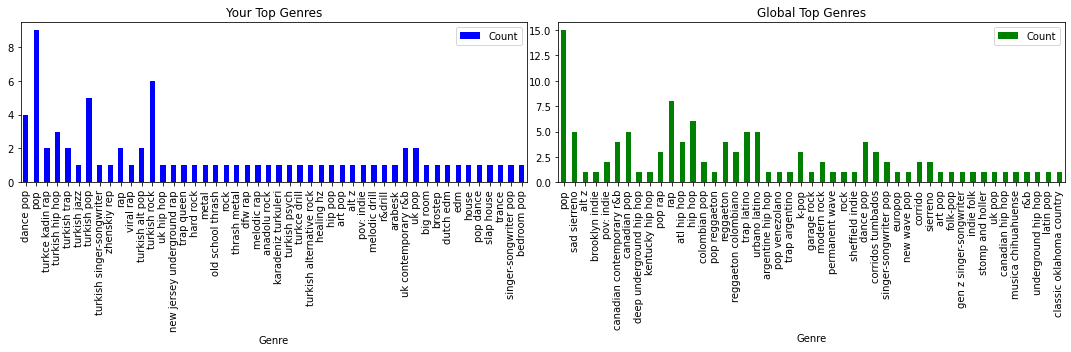

In [6]:
scope = 'user-top-read'

# Authenticate and create a Spotify object
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id, client_secret, redirect_uri, scope=scope))

def get_top_tracks_genres(sp, limit=50, time_range='medium_term'):
    top_tracks = sp.current_user_top_tracks(limit=limit, time_range=time_range)['items']
    genres_dict = {}

    for track in top_tracks:
        artist_id = track['artists'][0]['id']
        artist = sp.artist(artist_id)
        genres = artist['genres']

        for genre in genres:
            if genre in genres_dict:
                genres_dict[genre] += 1
            else:
                genres_dict[genre] = 1

    return genres_dict

user_genres = get_top_tracks_genres(sp)


def get_global_top_tracks_genres(sp, playlist_id='37i9dQZEVXbMDoHDwVN2tF'):  # This ID is for Spotify's Global Top 50
    playlist_tracks = sp.playlist_tracks(playlist_id)['items']
    genres_dict = {}

    for track in playlist_tracks:
        artist_id = track['track']['artists'][0]['id']
        artist = sp.artist(artist_id)
        genres = artist['genres']

        for genre in genres:
            if genre in genres_dict:
                genres_dict[genre] += 1
            else:
                genres_dict[genre] = 1

    return genres_dict

global_genres = get_global_top_tracks_genres(sp)


import matplotlib.pyplot as plt

def plot_genre_comparison(user_genres, global_genres):
    # Convert genre dictionaries to dataframes
    df_user = pd.DataFrame(list(user_genres.items()), columns=['Genre', 'Count'])
    df_global = pd.DataFrame(list(global_genres.items()), columns=['Genre', 'Count'])

    # Plotting
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    df_user.plot(kind='bar', x='Genre', y='Count', ax=axes[0], title='Your Top Genres', color='blue')
    df_global.plot(kind='bar', x='Genre', y='Count', ax=axes[1], title='Global Top Genres', color='green')

    plt.tight_layout()
    plt.show()

plot_genre_comparison(user_genres, global_genres)




Now I have further analyzed my music preferences by comparing my top genres with global trends. The purpose of this analysis within my project is to explore the intersection and divergence between my personal music tastes and the wider global listening patterns. This can reveal insights such as which genres are uniquely preferred by me versus those that are universally popular. It's a method of situating personal taste within the context of global music trends.

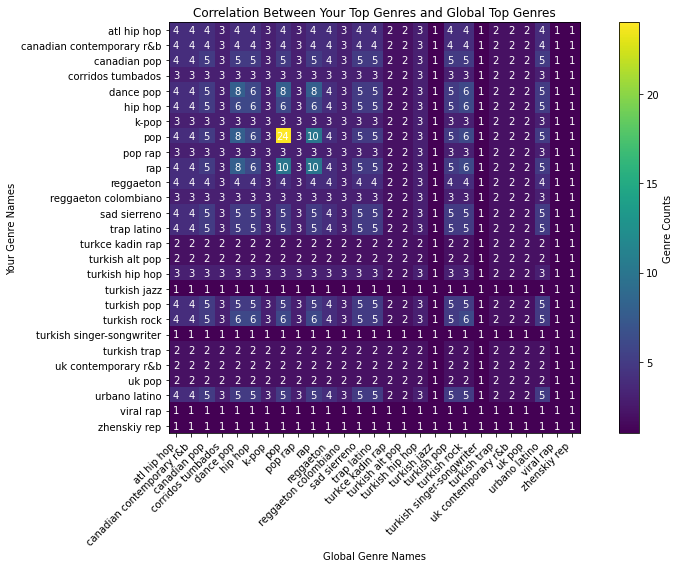

In [7]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Authenticate and create a Spotify object
scope = 'user-top-read'
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id, client_secret, redirect_uri, scope=scope))

# Assuming you have already set up your Spotify object 'sp' with the necessary credentials and scope
# and defined the functions 'get_top_tracks_genres' and 'get_global_top_tracks_genres'

# Function to get the top N genres
def get_top_n_genres(genres_dict, n):
    sorted_genres = sorted(genres_dict.items(), key=lambda x: x[1], reverse=True)
    top_n_genres = dict(sorted_genres[:n])
    return top_n_genres

# Get your top 15 genres and global top 15 genres
top_15_user_genres = get_top_n_genres(get_top_tracks_genres(sp), 15)
top_15_global_genres = get_top_n_genres(get_global_top_tracks_genres(sp), 15)

# Create a matrix to store genre counts
genre_names = list(top_15_user_genres.keys()) + list(top_15_global_genres.keys())
genre_names = list(set(genre_names))  # Remove duplicates
genre_names.sort()  # Sort alphabetically
genre_matrix = np.zeros((len(genre_names), len(genre_names)))

# Fill the matrix with counts
for i, genre1 in enumerate(genre_names):
    for j, genre2 in enumerate(genre_names):
        count1 = top_15_user_genres.get(genre1, 0) + top_15_global_genres.get(genre1, 0)
        count2 = top_15_user_genres.get(genre2, 0) + top_15_global_genres.get(genre2, 0)
        genre_matrix[i][j] = min(count1, count2)  # Use the minimum count

def plot_genre_correlation(genre_matrix, genre_names):
    # Create a figure and axis
    plt.figure(figsize=(12, 8))
    ax = plt.gca()

    # Create the heatmap
    heatmap = plt.imshow(genre_matrix, cmap='viridis')

    # Set labels for axes
    ax.set_xticks(np.arange(len(genre_names)))
    ax.set_yticks(np.arange(len(genre_names)))
    ax.set_xticklabels(genre_names, rotation=45, ha='right')
    ax.set_yticklabels(genre_names)

    # Show genre names in the heatmap
    for i in range(len(genre_names)):
        for j in range(len(genre_names)):
            text = ax.text(j, i, int(genre_matrix[i, j]), ha='center', va='center', color='w')

    plt.xlabel('Global Genre Names')
    plt.ylabel('Your Genre Names')

    # Add a colorbar
    cbar = plt.colorbar(heatmap)
    cbar.set_label('Genre Counts')

    plt.title('Correlation Between Your Top Genres and Global Top Genres')
    plt.tight_layout()
    plt.show()

plot_genre_correlation(genre_matrix, genre_names)


In here I implemented a multi-stage process to analyze my music genre preferences over different time frames using the Spotify API. I collected my top genres from Spotify for three different time ranges: long-term, medium-term, and short-term. This allows us to observe how my music tastes may have evolved over time. I created dictionaries for each time range, counting how many times each genre appears in your my tracks. This provides a quantitative measure of my preference for each genre. I plot this data in bar charts, showing the top 10 genres for each time range side-by-side. This visual comparison makes it easy to spot trends and changes in my music preferences.


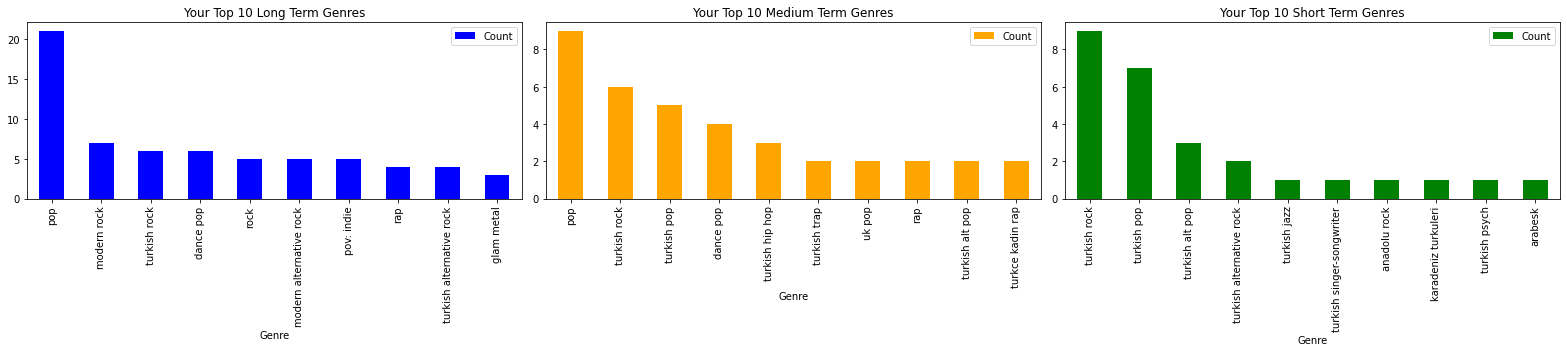

In [8]:
scope = 'user-top-read'
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id, client_secret, redirect_uri, scope=scope))


def get_top_tracks_genres(sp, time_range='medium_term', limit=50):
    top_tracks = sp.current_user_top_tracks(limit=limit, time_range=time_range)['items']
    genres_dict = {}

    for track in top_tracks:
        artist_id = track['artists'][0]['id']
        artist = sp.artist(artist_id)
        genres = artist['genres']

        for genre in genres:
            genres_dict[genre] = genres_dict.get(genre, 0) + 1

    return genres_dict

# Your favorite genres
user_genres_medium_term = get_top_tracks_genres(sp, time_range='medium_term')

user_genres_long_term = get_top_tracks_genres(sp, time_range='long_term')
user_genres_short_term = get_top_tracks_genres(sp, time_range='short_term')

# For global top genres, you might need to define a similar function or process 
# to fetch global top tracks for different time ranges. This depends on the data 
# available from Spotify for global trends.

import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import pandas as pd

def plot_top_10_genres_comparison(user_genres_long_term, user_genres_medium_term, user_genres_short_term):
    # Convert genre dictionaries to dataframes and sort them
    df_long_term = pd.DataFrame(list(user_genres_long_term.items()), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False).head(10)
    df_medium_term = pd.DataFrame(list(user_genres_medium_term.items()), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False).head(10)
    df_short_term = pd.DataFrame(list(user_genres_short_term.items()), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False).head(10)

    # Plotting
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 5))

    df_long_term.plot(kind='bar', x='Genre', y='Count', ax=axes[0], title='Your Top 10 Long Term Genres', color='blue')
    df_medium_term.plot(kind='bar', x='Genre', y='Count', ax=axes[1], title='Your Top 10 Medium Term Genres', color='orange')
    df_short_term.plot(kind='bar', x='Genre', y='Count', ax=axes[2], title='Your Top 10 Short Term Genres', color='green')

    plt.tight_layout()
    plt.show()


plot_top_10_genres_comparison(user_genres_long_term, user_genres_medium_term, user_genres_short_term)



 In the this part I combined the data from all three time frames in the previouse graphs into a single DataFrame to analyze trends. I identify genres that are 'Trending Up' (genres that are more popular in the short term than the medium term), 'New Interest' (genres that appear in the short term but not the long term), and 'Losing Interest' (genres that have decreased in count from long to medium to short term). Then plot all genres across the three time frames in a combined bar chart to visually compare their popularity. This helps to illustrate my shifting genre preferences over time and can highlight any patterns or shifts in my music listening habits. It includes my genre preferences across the time frames, as well as boolean columns indicating whether a genre is trending up, is a new interest, or I am are losing interest in it.

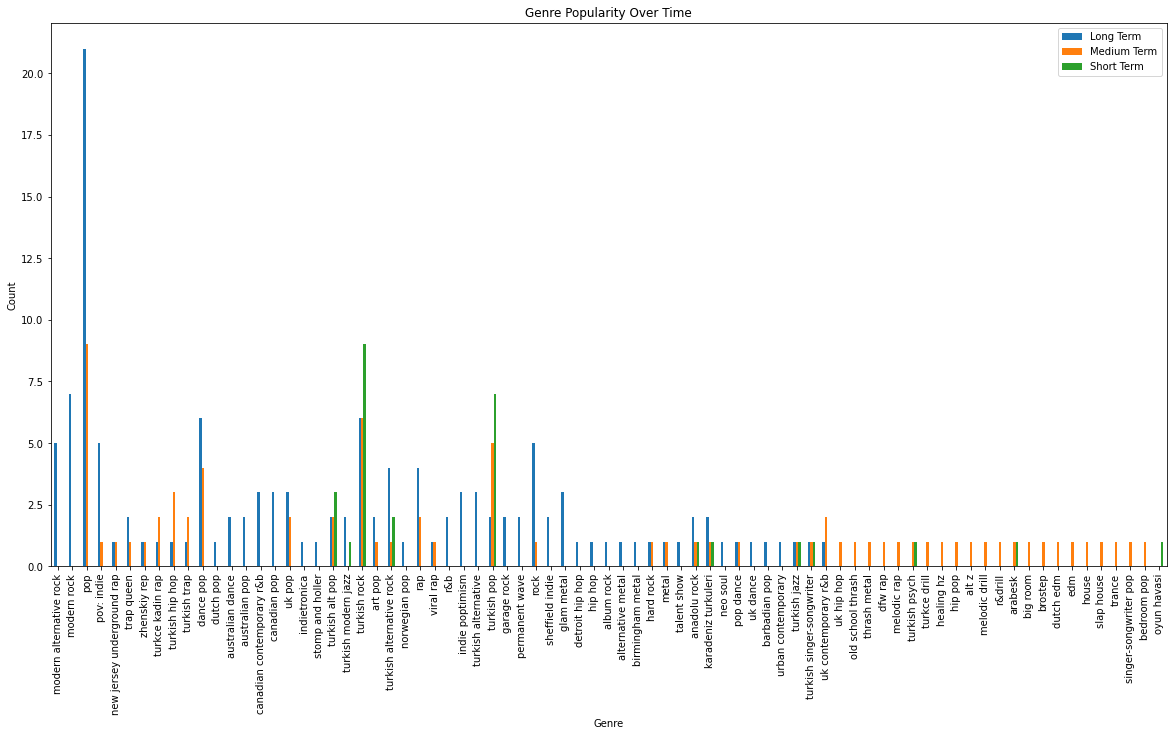

                            Long Term  Medium Term  Short Term  Trending Up  \
modern alternative rock             5            0           0        False   
modern rock                         7            0           0        False   
pop                                21            9           0        False   
pov: indie                          5            1           0        False   
new jersey underground rap          1            1           0        False   
...                               ...          ...         ...          ...   
slap house                          0            1           0        False   
trance                              0            1           0        False   
singer-songwriter pop               0            1           0        False   
bedroom pop                         0            1           0        False   
oyun havasi                         0            0           1         True   

                            New Interest  Losing In

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming user_genres_long_term, user_genres_medium_term, and user_genres_short_term are already defined

def combine_genres(*args):
    """
    Combine genres from different time frames into a single DataFrame
    """
    combined = {}
    for period, genres in zip(['Long Term', 'Medium Term', 'Short Term'], args):
        for genre, count in genres.items():
            if genre not in combined:
                combined[genre] = {'Long Term': 0, 'Medium Term': 0, 'Short Term': 0}
            combined[genre][period] = count
    return pd.DataFrame.from_dict(combined, orient='index')

def analyze_genre_trends(combined_df):
    """
    Analyze trends in genres over different time periods
    """
    # Add columns for trends analysis
    combined_df['Trending Up'] = combined_df['Short Term'] > combined_df['Medium Term']
    combined_df['New Interest'] = (combined_df['Short Term'] > 0) & (combined_df['Long Term'] == 0)
    combined_df['Losing Interest'] = (combined_df['Short Term'] < combined_df['Medium Term']) & (combined_df['Medium Term'] < combined_df['Long Term'])
    return combined_df

def plot_combined_genres(df):
    """
    Plot combined genres for visual comparison
    """
    df[['Long Term', 'Medium Term', 'Short Term']].plot(kind='bar', figsize=(20, 10))
    plt.title("Genre Popularity Over Time")
    plt.xlabel("Genre")
    plt.ylabel("Count")
    plt.show()

# Combine genres from different time frames
combined_genres_df = combine_genres(user_genres_long_term, user_genres_medium_term, user_genres_short_term)

# Analyze genre trends
analyzed_df = analyze_genre_trends(combined_genres_df)

# Plot the combined genres
plot_combined_genres(analyzed_df)

# Optionally, print the analyzed DataFrame for detailed examination
print(analyzed_df)


These are detailed information about tracks from one of my Spotify playlist and analysis of their audio features.The purpose of this process is to gain insights into the audio characteristics of the songs in a particular playlist, which is going to be used to understand my music preferences in terms of the audio features that Spotify tracks. This is also going to be used to identify patterns or trends within my favorite songs. It's an in-depth look at what makes up the music I prefer, informing future music recommendations or the curation of playlists that match certain moods or activities.

In [10]:
def get_playlist_tracks(username, playlist_id):
    results = sp.user_playlist_tracks(username, playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

def get_tracks_features(tracks):
    track_ids = [track['track']['id'] for track in tracks if track['track']]
    track_names = [track['track']['name'] for track in tracks if track['track']]
    track_popularity = [track['track']['popularity'] for track in tracks if track['track']]
    features = []
    for i, track_id in enumerate(track_ids):
        audio_features = sp.audio_features(track_id)[0]
        if audio_features:
            audio_features['track_name'] = track_names[i]
            audio_features['popularity'] = track_popularity[i]
            features.append(audio_features)
    return features

# Fetch tracks from one of your playlists
playlist_id = 'spotify:playlist:3uxfdBXH4nb9IHNpNBpwQr'  # Replace with one of your playlist IDs
tracks = get_playlist_tracks('Ecenaz Çelik', playlist_id)  # Replace with your username
tracks_features = get_tracks_features(tracks)

# Create a DataFrame
df_features = pd.DataFrame(tracks_features)

print(df_features)






    danceability   energy  key  loudness  mode  speechiness  acousticness  \
0         0.6260  0.97600    4    -5.100     0       0.0584        0.1570   
1         0.3040  0.71500    9    -5.848     0       0.0371        0.0702   
2         0.5820  0.81200    4    -5.423     0       0.0324        0.1430   
3         0.1810  0.73000    7    -6.552     1       0.0605        0.0296   
4         0.4970  0.85700    4    -5.525     0       0.0564        0.1570   
5         0.4770  0.89500    4    -4.832     0       0.0729        0.0433   
6         0.7430  0.63900    9    -6.515     1       0.0563        0.6330   
7         0.2970  0.48800    3    -6.896     1       0.0344        0.0862   
8         0.6740  0.86500    2    -5.899     0       0.1860        0.2720   
9         0.5780  0.88500    9    -6.669     1       0.0361        0.0126   
10        0.3400  0.48900    7   -15.316     1       0.0412        0.8300   
11        0.4560  0.11700    2   -18.909     1       0.0421        0.9360   

Here I applied a machine learning technique to predict the popularity of tracks based on their audio features using a Linear Regression model. A Linear Regression model is instantiated and trained on the training dataset. 
The purpose of this is to create a predictive model that can estimate how popular a song might be based on its audio features. This could help us to understand which attributes of a song contribute most to its popularity and potentially guide you in discovering or creating new playlists that align with popular music trends.

"X_train" represents the feature variables (independent variables) that are used to train my predictive model.
It contains a subset of my dataset, usually a majority of the data, and includes the feature values (attributes) for each data point.
Each row in X_train corresponds to a data point (observation), and each column represents a different feature or attribute.

"y_train" represents the target variable (dependent variable) that I am are trying to predict or model. It also contains a subset of your dataset, corresponding to the same data points as in X_train. 

"X_test" represents another subset of my dataset that is distinct from the training data. It contains feature variables similar to X_train, but these data points are reserved for testing the model's performance. The model does not see these data points during training and uses them for evaluation.

"y_test" corresponds to the target variable for the data points in X_test.
It contains the actual target values for the data points in the testing set, allowing me to compare the model's predictions with the real values for evaluation.

In summary, these variables are used to split my dataset into two parts: one for training the predictive model (X_train and y_train) and another for evaluating the model's performance (X_test and y_test). This separation helps assess how well the model generalizes to unseen data by comparing its predictions (on X_test) to the actual values (y_test).

The MSE measures the average squared difference between the actual 'popularity' values (y_test) and the predicted values (y_pred) made by my model.




In [17]:


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np

# Handling Missing Values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df_features_imputed = pd.DataFrame(imputer.fit_transform(df_features.select_dtypes(include=[np.number])))
df_features_imputed.columns = df_features.select_dtypes(include=[np.number]).columns
df_features_imputed.index = df_features.index

# Feature Scaling
scaler = StandardScaler()
feature_columns = df_features_imputed.columns.drop(['popularity'])
df_features_imputed[feature_columns] = scaler.fit_transform(df_features_imputed[feature_columns])


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Splitting the dataset into training and testing sets
X = df_features_imputed[feature_columns]
y = df_features_imputed['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Building the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Model Evaluation
print("Model Error (Mean Squared Error):", mean_squared_error(y_test, y_pred))


X_train shape: (32, 13)
y_train shape: (32,)
X_test shape: (14, 13)
y_test shape: (14,)
Model Error (Mean Squared Error): 874.7987510642754


This section creates a scatter plot to compare actual popularity scores (from your Spotify data) against predicted popularity scores (obtained from the previous predictive model). It plots each actual popularity score (y_test) against its corresponding predicted score (y_pred). This visualization helps in assessing how well my predictive model is performing. Points closer to a diagonal line would indicate better prediction accuracy.



Second part is a heatmap to display the correlation between different features in my dataset. This heatmap is useful for understanding the relationships between different features, which can inform feature selection or engineering in predictive modeling.

The purpose of this part is to visualize and analyze the data and the performance of my predictive model, specifically focusing on predicting the popularity of songs or artists based on my Spotify data. It's an integral part of the exploratory data analysis and model evaluation process in my project.

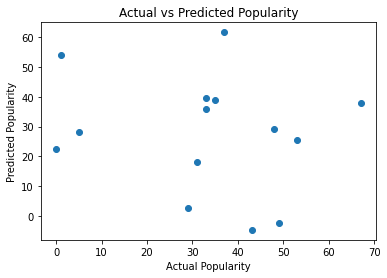

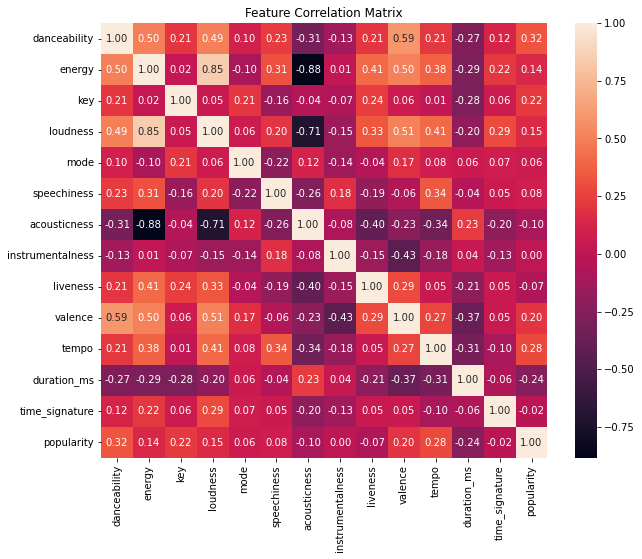

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Actual vs Predicted Popularity Visualization
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Actual vs Predicted Popularity')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_features_imputed.corr(), annot=True, fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()


I am analyzing my Spotify listening habits. I have extracted specific components like the hour of the day, day of the week, and month from my data then group and count the tracks based on these time components, allowing me to analyze my listening habits across different time frames (hour, day, month).
The analysis results are visualized using bar charts, showing the number of tracks played at different hours of the day, on different days of the week, and in different months (if applicable).
These visualizations help in understanding patterns in my listening habits, like what time of day I listen to music the most or which days of the week I am more likely to listen to music.
The purpose of this part is to gain insights into my personal Spotify listening habits, understanding patterns and preferences in my music consumption over time. This can be useful for potentially informing recommendations or further music exploration.

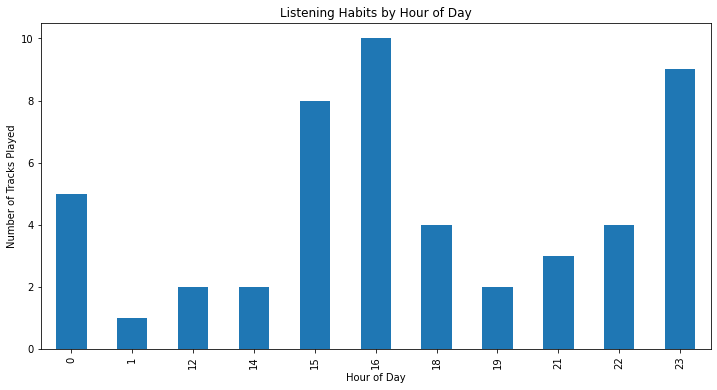

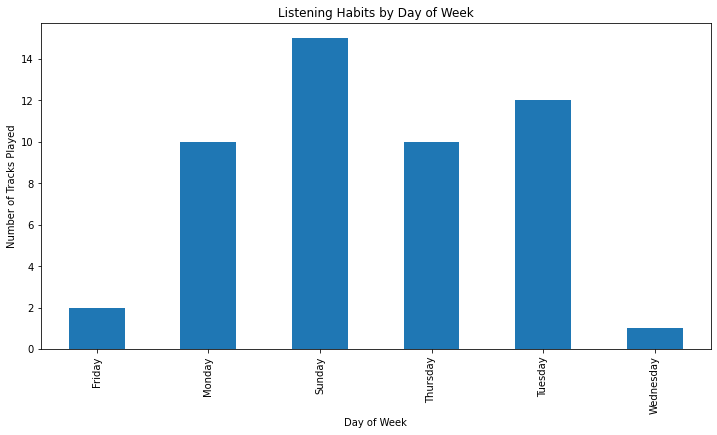

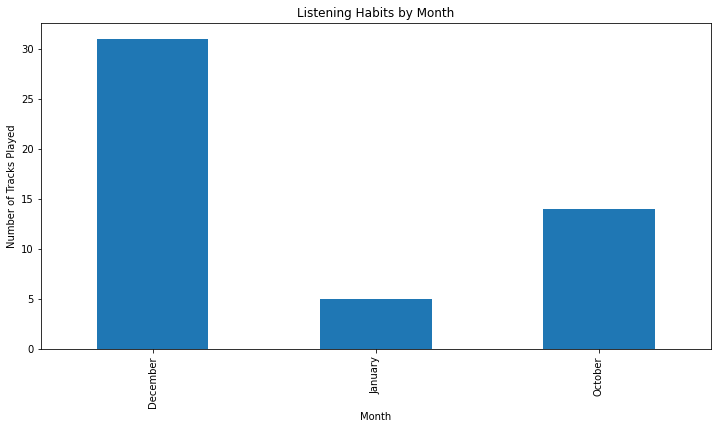

In [13]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
client_id = '961b3169232448309a978bb1ea0a20d9'
client_secret = '3d947f0b28b14cd2a57a4da17265eb42'
redirect_uri = 'http://localhost:5173/callback'

# Set up Spotipy client
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id="961b3169232448309a978bb1ea0a20d9", client_secret="3d947f0b28b14cd2a57a4da17265eb42",
                                               redirect_uri="http://localhost:5173/callback",
                                               scope="user-read-recently-played"))

# Fetch recently played tracks
recently_played = sp.current_user_recently_played(limit=50)
import pandas as pd

# Extract track info and played_at
tracks_data = []
for track in recently_played['items']:
    track_info = {
        'played_at': track['played_at'],
        'track_name': track['track']['name'],
        'artist': track['track']['artists'][0]['name'],
        # Add more attributes as needed
    }
    tracks_data.append(track_info)

# Create a DataFrame
df = pd.DataFrame(tracks_data)

# Convert 'played_at' to datetime
df['played_at'] = pd.to_datetime(df['played_at'])
# Extract the hour of the day
df['hour'] = df['played_at'].dt.hour

# Group by hour and count
time_of_day_analysis = df.groupby('hour').size()
# Extract the day of the week
df['day_of_week'] = df['played_at'].dt.day_name()

# Group by day of the week and count
day_of_week_analysis = df.groupby('day_of_week').size()
# Extract the month
df['month'] = df['played_at'].dt.month_name()

# Group by month and count
month_analysis = df.groupby('month').size()
import matplotlib.pyplot as plt

# Time of Day Analysis Plot
plt.figure(figsize=(12, 6))
time_of_day_analysis.plot(kind='bar')
plt.title('Listening Habits by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Tracks Played')
plt.show()

# Day of the Week Analysis Plot
plt.figure(figsize=(12, 6))
day_of_week_analysis.plot(kind='bar')
plt.title('Listening Habits by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Tracks Played')
plt.show()

# Month Analysis Plot (if applicable)
plt.figure(figsize=(12, 6))
month_analysis.plot(kind='bar')
plt.title('Listening Habits by Month')
plt.xlabel('Month')
plt.ylabel('Number of Tracks Played')
plt.show()


In this part, I am utilizing my Spotipy data to perform a more detailed analysis of my Spotify listening habits, focusing on the audio features of the tracks that I have listened to. The purpose of this is to delve deeper into my music listening patterns, specifically by analyzing the characteristics of the music (like danceability, energy, etc.) across different times. This kind of analysis can provide insights into my music preferences and how they change over time or in different contexts. It's a more nuanced approach to understanding music listening behavior compared to just looking at track names or artists. It allows me to analize my mood over time and what kind of music that I listen based on my mood.

In [14]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Set up Spotipy client
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id="961b3169232448309a978bb1ea0a20d9", client_secret="3d947f0b28b14cd2a57a4da17265eb42",
                                               redirect_uri="http://localhost:5173/callback",
                                               scope="user-read-recently-played"))
recently_played = sp.current_user_recently_played(limit=50)

# Get track IDs
track_ids = [track['track']['id'] for track in recently_played['items']]

# Fetch audio features
audio_features = sp.audio_features(tracks=track_ids)

# Step 2: Data Processing
# Create DataFrame for analysis
tracks_data = []
for track, features in zip(recently_played['items'], audio_features):
    track_info = {
        'played_at': track['played_at'],
        'danceability': features['danceability'],
        'energy': features['energy'],
        'loudness': features['loudness'],
        'mode': features['mode'],
        'speechiness': features['speechiness'],
        'tempo': features['tempo'],
    }
    tracks_data.append(track_info)

df = pd.DataFrame(tracks_data)

# Convert 'played_at' to datetime and extract relevant time parts
df['played_at'] = pd.to_datetime(df['played_at'])
df['hour'] = df['played_at'].dt.hour
df['day_of_week'] = df['played_at'].dt.day_name()
df['month'] = df['played_at'].dt.month_name()

# Step 3: Analysis
# Calculate average audio features by hour of the day
hourly_analysis = df.groupby('hour').mean()

# Calculate average audio features by day of the week
day_of_week_analysis = df.groupby('day_of_week').mean()

# Calculate average audio features by month
monthly_analysis = df.groupby('month').mean()
# Step 3: Visualization - All Audio Features for Hour of the Day
# Step 3: Visualization - All Audio Features Except Tempo for Hour of the Day
# Step 3: Visualization - Selected Audio Features for Hour of the Day
selected_audio_features = ['danceability', 'energy', 'mode', 'speechiness']



def display_graph(time_category):
    plt.figure(figsize=(14, 6))
    if time_category == 'Hour of the Day':
        hourly_analysis[selected_audio_features].plot(kind='bar')
        plt.title('Average Selected Audio Features by Hour of the Day')
        plt.xlabel('Hour of the Day')
    elif time_category == 'Day of the Week':
        day_of_week_analysis[selected_audio_features].plot(kind='bar')
        plt.title('Average Selected Audio Features by Day of the Week')
        plt.xlabel('Day of the Week')
    elif time_category == 'Month':
        monthly_analysis[selected_audio_features].plot(kind='bar')
        plt.title('Average Selected Audio Features by Month')
        plt.xlabel('Month')
    plt.ylabel('Average Value')
    plt.legend(title='Audio Features', loc='upper right')
    plt.tight_layout()
    plt.show()

# Create a dropdown widget to select the time-related category
time_category_dropdown = widgets.Dropdown(
    options=['Hour of the Day', 'Day of the Week', 'Month'],
    value='Hour of the Day',
    description='Select Time Category:',
)

# Create an interactive widget with the dropdown and the display function
interactive_plot = widgets.interactive(display_graph, time_category=time_category_dropdown)

# Display the interactive widget
display(interactive_plot)

interactive(children=(Dropdown(description='Select Time Category:', options=('Hour of the Day', 'Day of the We…